In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Dataset
df=pd.read_csv("/content/drive/My Drive/jobs_in_data.csv")

In [6]:
#Understanding Data
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [ ]:
#Data cleaning
df.isna()
df.fillna("Not Available")

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


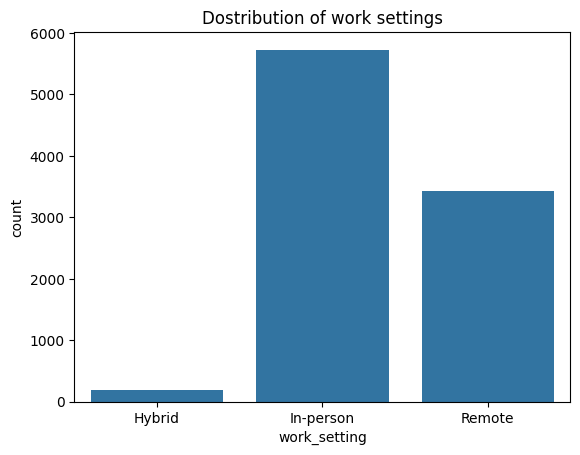

In [8]:
#work_setting(Remote,Hybrid or In-person) Analysis
sns.countplot(x="work_setting",data=df)
plt.title("Dostribution of work settings")
plt.show()

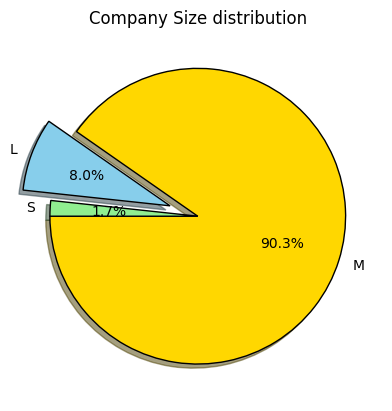

In [32]:
#Company size distribution
s=df["company_size"].value_counts()
colors=["gold","skyblue","lightgreen"]
explode=[0,0.2,0]
plt.pie(s,colors=colors,explode=explode,shadow=True,startangle=180,autopct="%1.1f%%",labels=["M","L","S"],wedgeprops={"edgecolor":"black"})
plt.title("Company Size distribution")
plt.show()

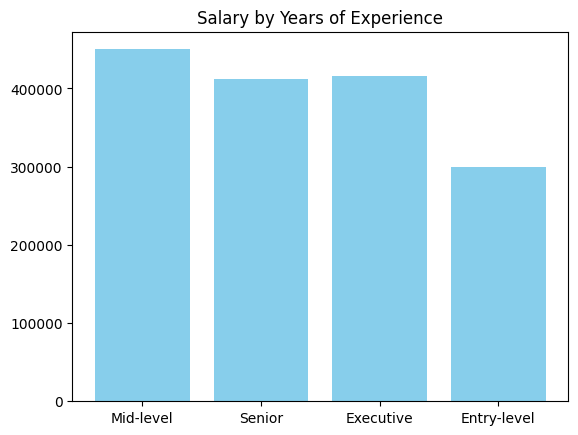

In [46]:

#Experience level vs Salary
plt.bar(df["experience_level"],df["salary"],color="skyblue")
plt.title("Salary by Years of Experience")
plt.show()

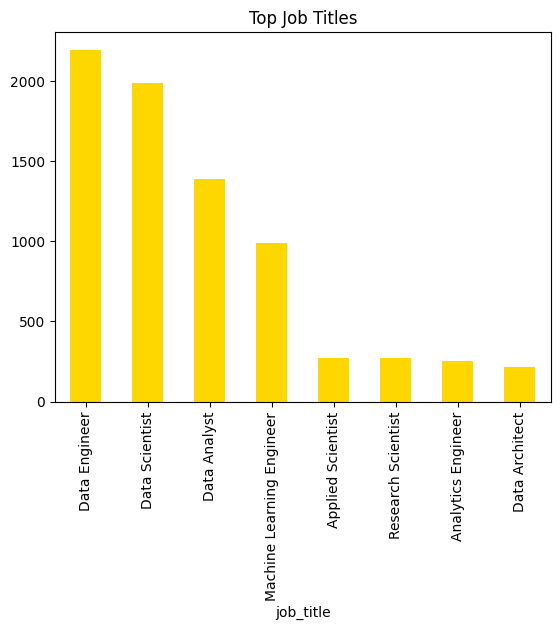

In [45]:
#Job title Analysis
df["job_title"].value_counts().head(8).plot(kind="bar",color="gold")
plt.title("Top Job Titles")
plt.show()

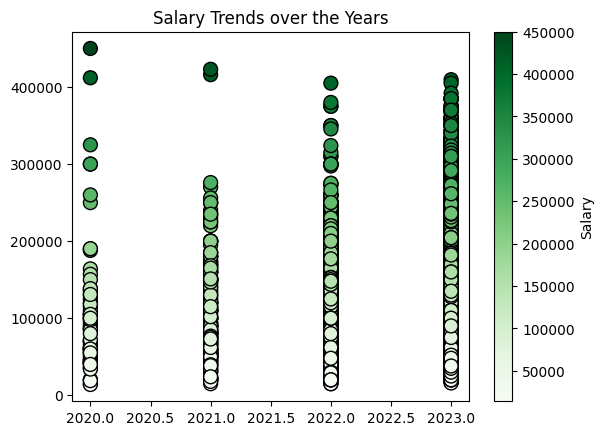

In [71]:
# salary vs work year
x=df["work_year"]
y=df["salary"]
plt.scatter(x,y,s=100,c=df["salary"],edgecolor="Black",linewidth=1,cmap="Greens")
Cbar=plt.colorbar()
Cbar.set_label("Salary")
plt.title("Salary Trends over the Years")
plt.show()

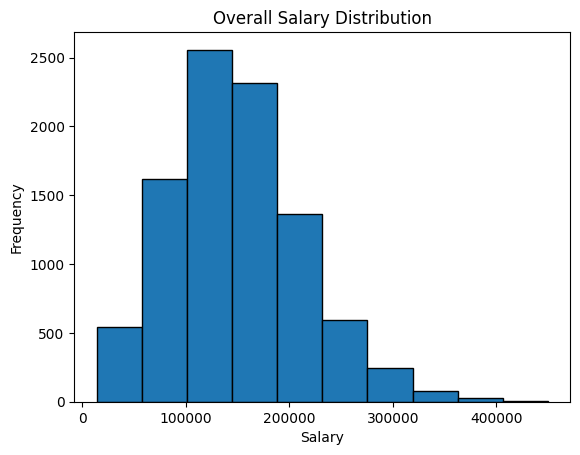

In [49]:
#salary distribution
x=df["salary"]
bins=10
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Overall Salary Distribution")
plt.hist(x,bins,edgecolor="black")
plt.show()

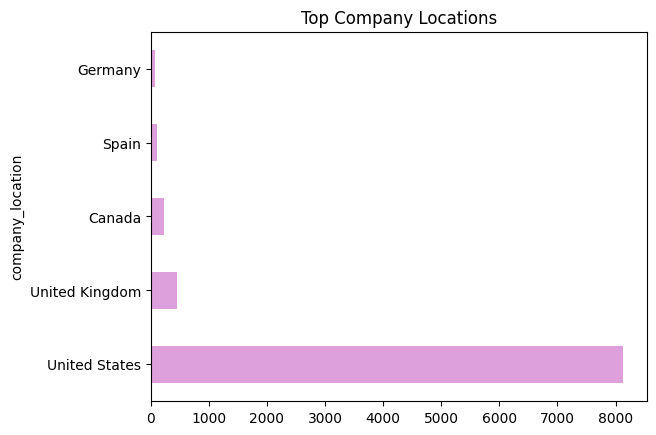

In [62]:
#company Location analysis
df["company_location"].value_counts().head(5).plot(kind="barh",color="plum")
plt.title("Top Company Locations")
plt.show()

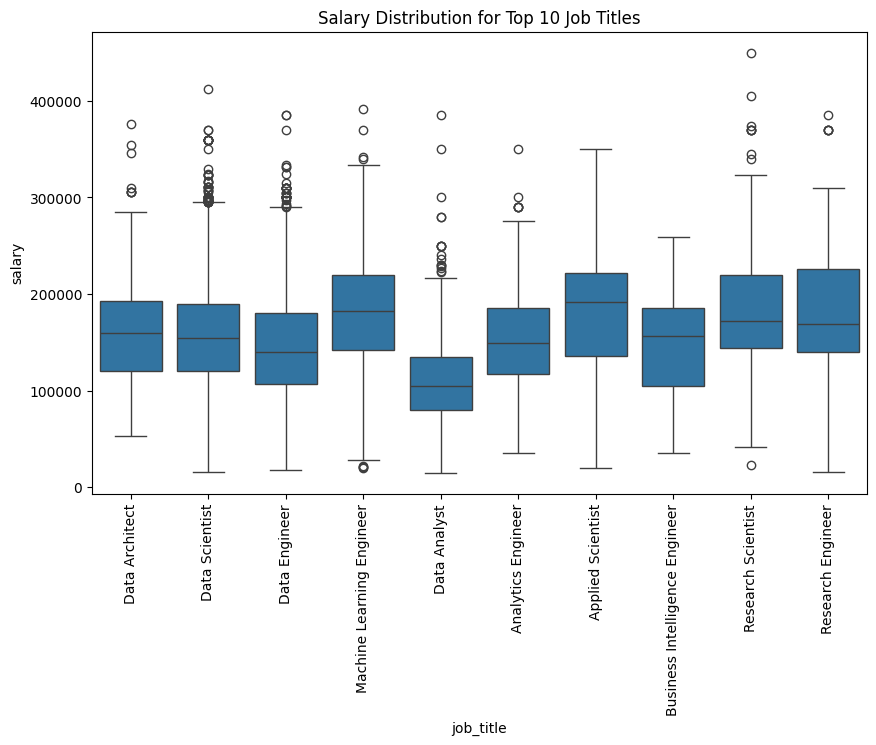

In [100]:
#Salary distribution for top 10 job titles
top_jobs=df['job_title'].value_counts().nlargest(10).index
df_top=df[df["job_title"].isin(top_jobs)]
plt.figure(figsize=(10,6))
sns.boxplot(x="job_title",y="salary",data=df_top)
plt.xticks(rotation=90)
plt.title("Salary Distribution for Top 10 Job Titles")
plt.show()

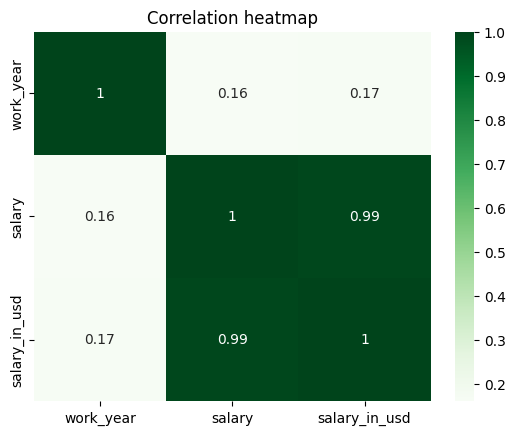

In [113]:
#Heat map
df2=df.select_dtypes(include=["int","float"])
mat=df2.corr()
sns.heatmap(mat,annot=True,cmap="Green")
plt.title("Correlation heatmap")
plt.show()